# PLANT  DISEASE CLASSIFICATION - ALEXNET


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models,transforms
from torch.autograd import Variable

from dl4cv.classifiers.AlexNet_network import ClassificationNetwork
from dl4cv.data_utils import ClassificationData

torch.set_default_tensor_type('torch.FloatTensor')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Train and validation data

Download the dataset with the `datasets/get_segmentation_dataset.sh` script and make yourself familiar with it. Look at the labels described in `datasets/segmentation_data/info.html` and note the label `unlabeled`. Pixels with the label `unlabeled` should neither be considered in your loss nor the accuracy.

In [26]:
import os
dataset_folder = os.path.join(os.path.join(os.path.expanduser('~')), 'Desktop', 'datasets', 'train') 

train_data = ClassificationData(root=dataset_folder,
                              image_list='train.txt')

val_data = ClassificationData(root=dataset_folder,
                            image_list='val.txt')

test_data = ClassificationData(root=dataset_folder,
                            image_list='test.txt')

Train size: 5000
Validation size: 1000
Test size: 1000
Img size: torch.Size([3, 240, 240])
0


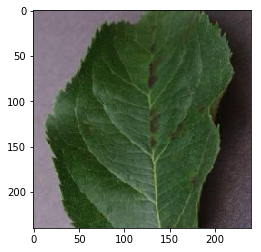

True


In [27]:
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))
print("Test size: %i" % len(test_data))

img, target = train_data[1]
#img, img_hog, target = train_data[1]

print("Img size: " + str(img.size()))
print(target)

plt.figure(figsize=(4,4))
plt.imshow(img.numpy().transpose(1,2,0))
plt.show()

#plt.figure(figsize=(4,4))
#plt.imshow(img_hog.numpy().transpose(1,2,0))
#plt.show()

use_gpu = torch.cuda.is_available()
print use_gpu

# Data Augmentation 

# Test Model

In [28]:
from dl4cv.classifiers.AlexNet_network import ClassificationNetwork
from torchvision import models
alex_model = models.alexnet(pretrained=True)
print alex_model

for param in alex_model.parameters():
    param.requires_grad = False
    
my_model = ClassificationNetwork()
for param in my_model.parameters():
    print param.requires_grad
    
img1 = torch.rand((3,3,240,240))
print type(img1)
inp = Variable(img1)
print type(inp)
print inp.size()
output1 = alex_model.forward(inp)
print output1.size()

output2 = my_model.forward(inp)
print output2.size()

AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
    (6): Linear (4096 -> 1000)
  )
)
False
False
False
False
Fals

# Training the network
Implement your network architecture in `classifiers.segmentation_network.py` and adapt your `Solver` to process segmentation labels. Think about finetuning a model instead of training from scratch. If you are not equipped with a CUDA GPU test your model locally and then finish training on the computers in our lab.

In [29]:
from dl4cv.classifiers.AlexNet_network import ClassificationNetwork
from dl4cv.classifiers.solver import Solver

############################################################################
#                             YOUR CODE                                    #
############################################################################

train_loader = torch.utils.data.DataLoader(train_data, batch_size=50, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=50, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=False, num_workers=4)

model = ClassificationNetwork()

lr_list = [1e-5, 5e-5, 1e-4, 5e-4]
wd_list = [0.001, 0.002, 0.003, 0.004, 0.005]

for lr_test in range(lr_list):
    for wd_test in range(wd_list):
        
        solver = Solver(optim_args={"lr": lr_test, "weight_decay": wd_test})
        solver.train(model, train_loader, val_loader, log_nth=20, num_epochs=15)


START TRAIN.
[Iteration 19/100] Train loss: 2.3389
[Iteration 39/100] Train loss: 1.6137
[Iteration 59/100] Train loss: 1.1505
[Iteration 79/100] Train loss: 0.6418
[Iteration 99/100] Train loss: 0.5078
[Epoch 0/15] Train acc/loss: 0.5702/0.5078
[Epoch 0/15] Val acc/loss: 0.7480/0.7582
[Iteration 19/100] Train loss: 0.5261
[Iteration 39/100] Train loss: 0.4997
[Iteration 59/100] Train loss: 0.6230
[Iteration 79/100] Train loss: 0.6562
[Iteration 99/100] Train loss: 0.4803
[Epoch 1/15] Train acc/loss: 0.8332/0.4803
[Epoch 1/15] Val acc/loss: 0.8240/0.4859
[Iteration 19/100] Train loss: 0.3947
[Iteration 39/100] Train loss: 0.4753
[Iteration 59/100] Train loss: 0.5427
[Iteration 79/100] Train loss: 0.3722
[Iteration 99/100] Train loss: 0.2010
[Epoch 2/15] Train acc/loss: 0.8728/0.2010
[Epoch 2/15] Val acc/loss: 0.8420/0.8679
[Iteration 19/100] Train loss: 0.2512
[Iteration 39/100] Train loss: 0.1774
[Iteration 59/100] Train loss: 0.3671
[Iteration 79/100] Train loss: 0.2721
[Iteration 99

In [30]:
trainiter = iter(train_loader)
images, labels = trainiter.next()
print images.size()
print labels.size()

torch.Size([50, 3, 240, 240])
torch.Size([50])


# Plotting loss and accuracy curves

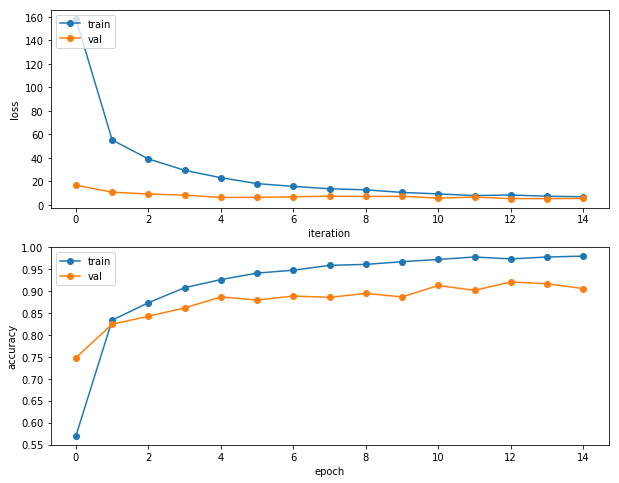

In [31]:
plt.subplot(2, 1, 1)
plt.plot(solver.train_loss_history_per_epoch, '-o')
plt.plot(solver.val_loss_history_per_epoch, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Visualization of filters
You can visualize the first-layer convolutional filters from the trained network by running the following. If your kernel visualizations do not exhibit clear structures try optimizing the weight scale:

In [1]:
"""
from dl4cv.vis_utils import visualize_grid

conv_params = model.get_features_data(8)
grid = visualize_grid(conv_params.transpose(0, 2, 3, 1))
print grid.shape
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(6, 6)
plt.show()

conv_params = model.get_features_data(10)
grid = visualize_grid(conv_params.transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(6, 6)
plt.show()
"""

"\nfrom dl4cv.vis_utils import visualize_grid\n\nconv_params = model.get_features_data(8)\ngrid = visualize_grid(conv_params.transpose(0, 2, 3, 1))\nprint grid.shape\nplt.imshow(grid.astype('uint8'))\nplt.axis('off')\nplt.gcf().set_size_inches(6, 6)\nplt.show()\n\nconv_params = model.get_features_data(10)\ngrid = visualize_grid(conv_params.transpose(0, 2, 3, 1))\nplt.imshow(grid.astype('uint8'))\nplt.axis('off')\nplt.gcf().set_size_inches(6, 6)\nplt.show()\n"

# Test your model
Since this dataset is very small we only provided you with a validation set.

In [4]:
test_data = ClassificationData(root=dataset_folder, image_list='test.txt')
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=1)

test_scores = []
model.eval()
for batch in test_loader:
    inputs, labels = Variable(batch[0]), Variable(batch[1])

    outputs = model.forward(inputs)
    _, preds = torch.max(outputs, 1)
    labels_mask = labels >= 0
    #print(np.mean((preds == labels)[labels_mask].data.numpy()))
    test_scores.append(np.mean((preds == labels)[labels_mask].data.numpy()))
model.train()
test_acc = np.mean(test_scores)
print(test_acc)

NameError: name 'dataset_folder' is not defined

## Save the model

When you are satisfied with your training, save the model for submission.

In [ ]:
model.save("models/segmentation_network.model")